In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [119]:
df=pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df.sample(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39799,30941062,Cozy & Clean private bedroom in Columbus Circle.,221591996,Sehwan,Manhattan,Hell's Kitchen,40.76732,-73.98482,Private room,89,5,2,2019-01-09,0.32,1,0
29459,22602605,2-Bedroom Apartment at Fort Greene,15535189,Yi,Brooklyn,Bedford-Stuyvesant,40.68788,-73.95741,Entire home/apt,95,2,4,2018-05-02,0.26,1,0
18920,15034150,34th street &6th ave.! Doorman Gym Studio 5220,16098958,Jeremy & Laura,Manhattan,Midtown,40.75034,-73.98780,Entire home/apt,250,30,0,NaN,NaN,96,311
34481,27359897,"ACintheroom!NEAR 3-4-A-C lines, quiet neighbor...",47782497,Robianddebbie,Brooklyn,East New York,40.67061,-73.87590,Private room,45,7,24,2019-06-29,2.11,3,313
18073,14151551,Great location 15minutes to South central park...,57890723,John,Queens,Sunnyside,40.74305,-73.91680,Private room,55,2,67,2019-04-09,1.90,1,0
38996,30469105,"Global Sanctuary ~ Brooklyn, Entire House",88036082,DaNeilia,Brooklyn,East Flatbush,40.63912,-73.92827,Entire home/apt,125,2,17,2019-03-08,2.48,2,0
30959,23990868,1 Bedroom in Luxury Building,4447548,Grace,Brooklyn,Bedford-Stuyvesant,40.69336,-73.94453,Entire home/apt,88,2,8,2019-06-16,0.56,1,18


**РАЙОНЫ + ЦЕНЫ**

Для построения графиков цен я рассматриваю только квартиры со стоимостью <500 долларов.

In [120]:
df_less_500=df[df.price <= 500]
df_more_500=df[df.price > 500]
df_less_1000=df[df.price <= 1000]

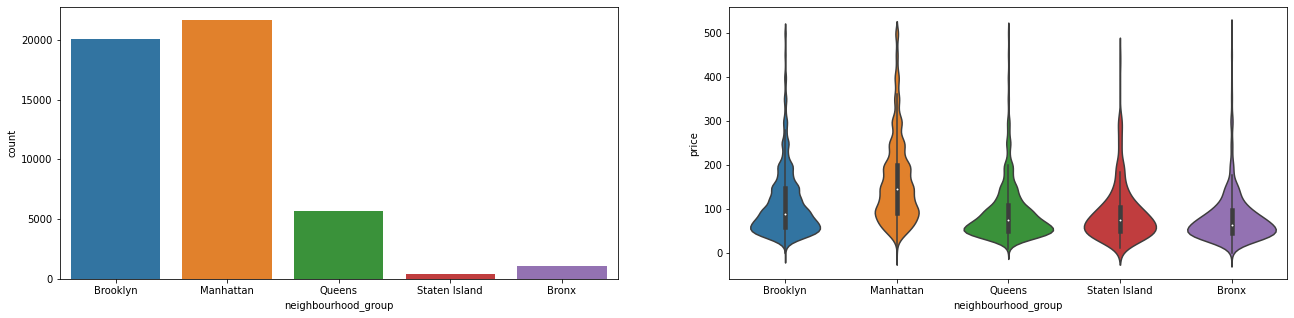

In [121]:
fig, axes = plt.subplots(1,2, figsize=(22,5))
x1 = sns.countplot(df['neighbourhood_group'] ,ax=axes[0])
x2 = sns.violinplot(data=df_less_500, x='neighbourhood_group', y='price', ax=axes[1])

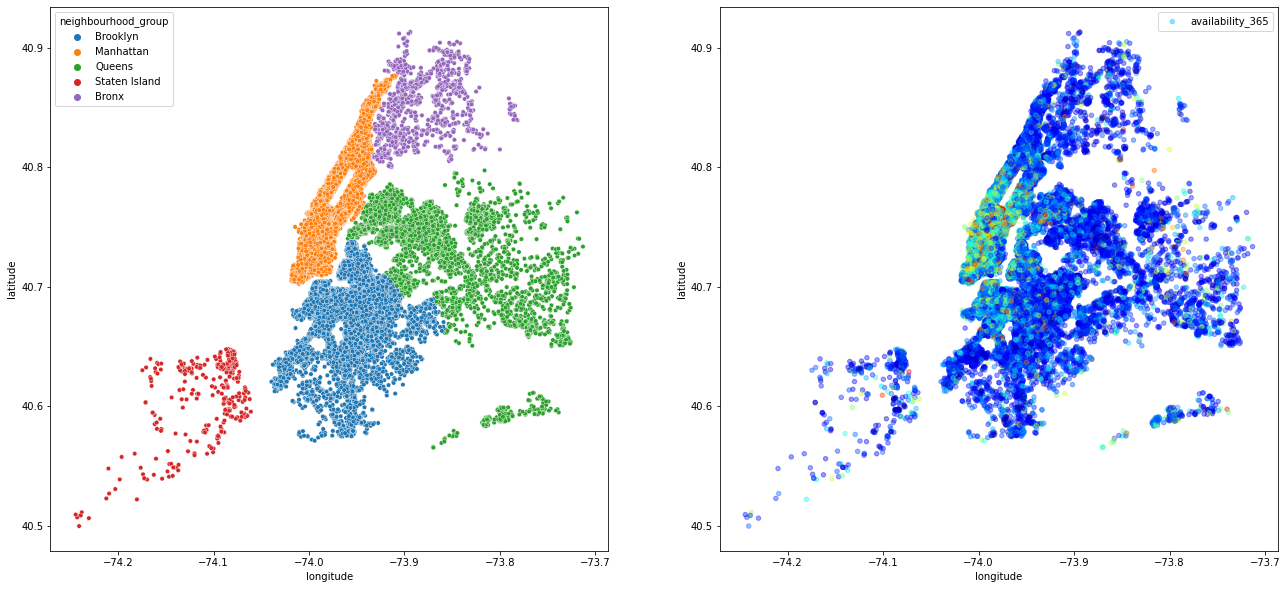

In [122]:
fig, axes = plt.subplots(1,2, figsize=(22,10))
sc = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, s=20, ax=axes[0])
v2=df_less_500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=False, alpha=0.4, ax=axes[1])

In [123]:
import geopandas

geometry = geopandas.points_from_xy(df.longitude, df.latitude)
geo_data = geopandas.GeoDataFrame(df,crs={'init':'epsg:4326'},geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

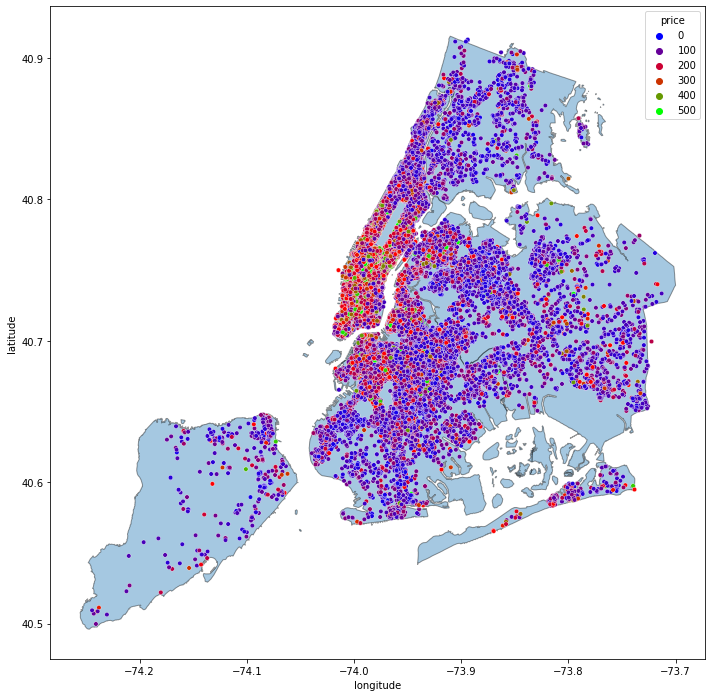

In [124]:
fig,ax = plt.subplots(figsize=(12,12))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
sns.scatterplot(x='longitude', y='latitude', hue='price', ax=ax, data=df_less_500, s=20, palette="brg")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

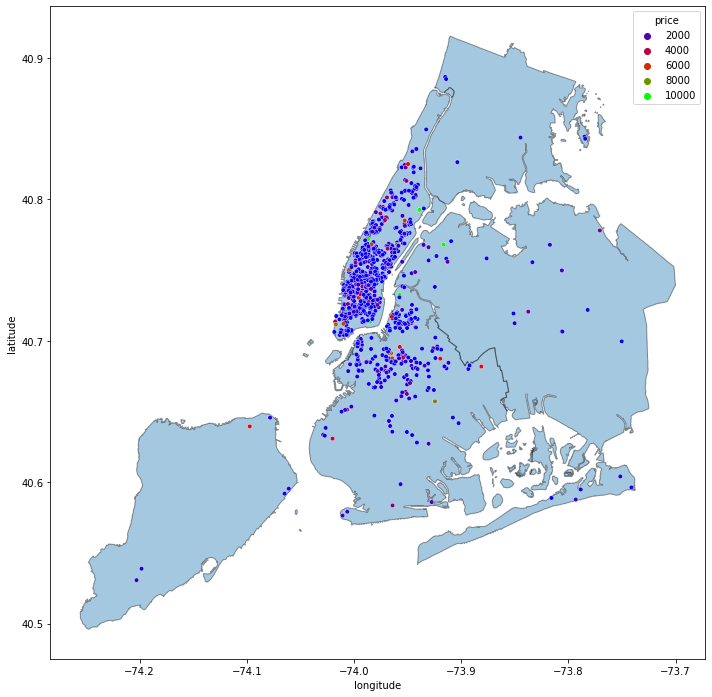

In [125]:
fig,ax = plt.subplots(figsize=(12,12))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
sns.scatterplot(x='longitude', y='latitude', hue='price', ax=ax, data=df_more_500, s=20, palette="brg")

<AxesSubplot:xlabel='price', ylabel='Density'>

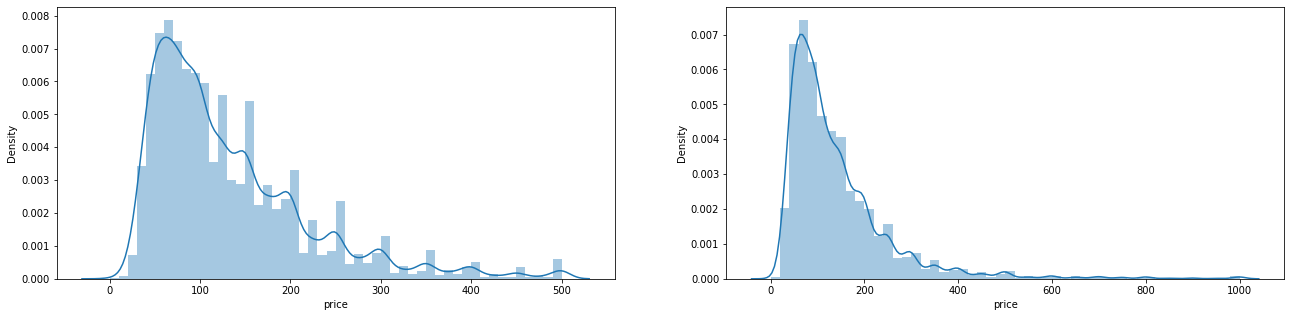

In [126]:
fig, axes = plt.subplots(1,2, figsize=(22,5))
sns.distplot(df_less_500.price, ax=axes[0])
sns.distplot(df_less_1000.price, ax=axes[1])

**МИКРОРАЙОНЫ**

<BarContainer object of 10 artists>

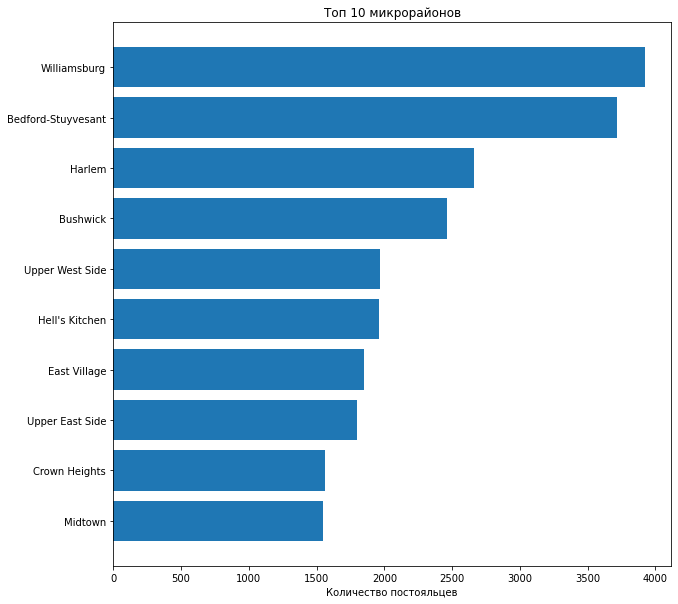

In [127]:


data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(10, 10))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()
plt.title("Топ 10 микрорайонов")
plt.xlabel("Количество постояльцев")
plt.barh(x, y)


**Типы квартир**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

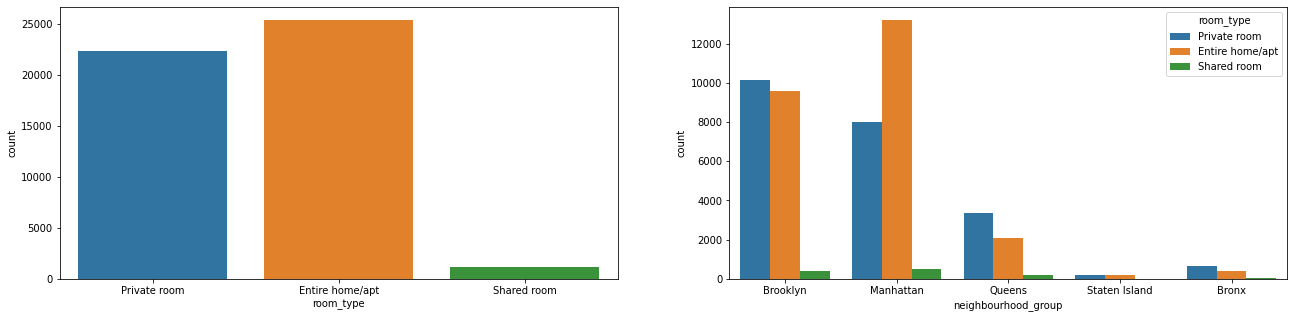

In [128]:
fig, axes = plt.subplots(1,2, figsize=(22,5))
sns.countplot(x='room_type', data=df, ax=axes[0]) 
sns.countplot(df['neighbourhood_group'],hue=df['room_type'], ax=axes[1])

Text(0.5, 1.0, '-')

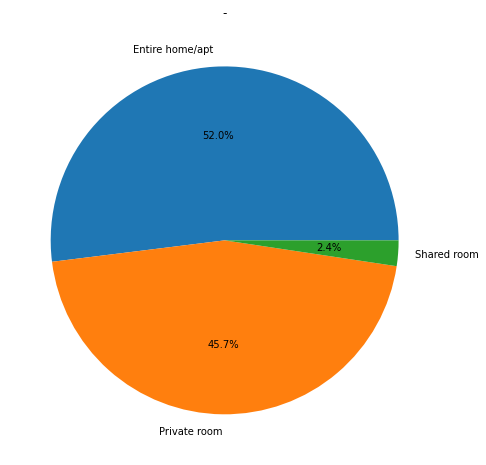

In [137]:
type = df['room_type'].value_counts().index
size = df['room_type'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(size, labels=type, autopct='%1.1f%%')
plt.title('-')

<AxesSubplot:xlabel='room_type', ylabel='number_of_reviews'>

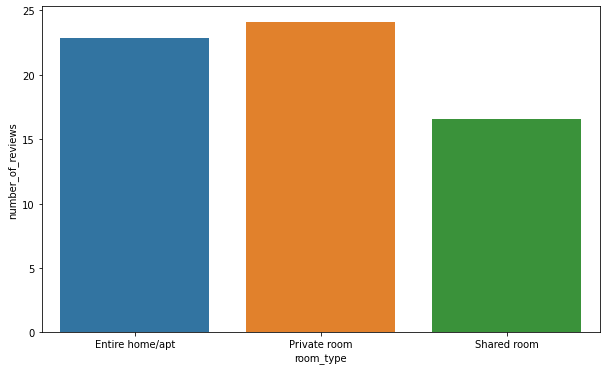

In [135]:
ngroup = df.groupby('room_type', as_index=False)[['number_of_reviews']].mean()
plt.figure(figsize=(10,6))
sns.barplot(data=ngroup, x=ngroup['room_type'], y=ngroup['number_of_reviews'])

Text(0.5, 1.0, 'Цены')

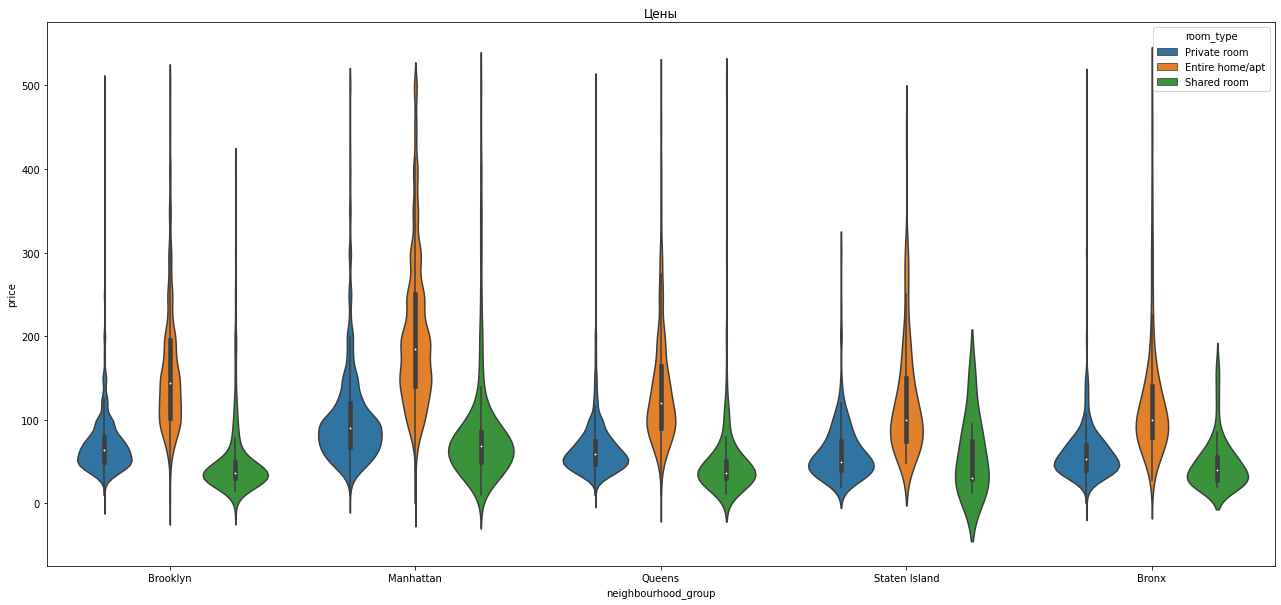

In [131]:
plt.figure(figsize=(22, 10))
f = sns.violinplot(x="neighbourhood_group", y="price", hue="room_type", data=df_less_500, height=12)
plt.title('Цены')

**Количество ночей**

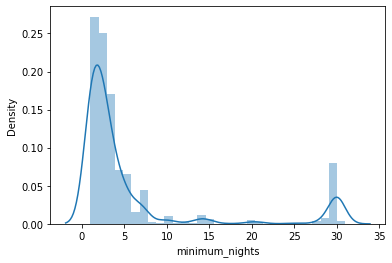

In [132]:
sns.distplot(df[(df['minimum_nights'] <= 31) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()


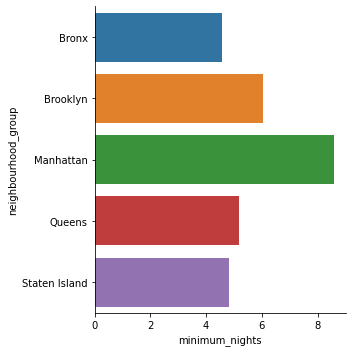

In [140]:
df_night = df.groupby(["neighbourhood_group"])["minimum_nights"].mean().round(2)
df_dataset_night = pd.DataFrame(df_night)
df_dataset_night = df_dataset_night.reset_index()

sns.catplot(x="minimum_nights", y = "neighbourhood_group", kind = "bar", data = df_dataset_night)

